In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt




In [8]:
data = pd.read_csv('/Users/a.groon/Desktop/SDAIA Project/test_scores.csv')
data.head(5)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [9]:
data.count()

school             2133
school_setting     2133
school_type        2133
classroom          2133
teaching_method    2133
n_student          2133
student_id         2133
gender             2133
lunch              2133
pretest            2133
posttest           2133
dtype: int64

In [10]:
pd.crosstab(data['school_setting'],data['school_type'], normalize='index')

school_type,Non-public,Public
school_setting,,
Rural,0.190196,0.809804
Suburban,0.269177,0.730823
Urban,0.288079,0.711921


In [11]:
pd.crosstab(data['school_type'],data['lunch'], normalize='index')

lunch,Does not qualify,Qualifies for reduced/free lunch
school_type,,
Non-public,0.713249,0.286751
Public,0.519595,0.480405


In [12]:
pd.pivot_table(data, values='posttest', index=['school_type'],
                    columns=['lunch'], aggfunc=np.mean)

lunch,Does not qualify,Qualifies for reduced/free lunch
school_type,,
Non-public,79.399491,67.411392
Public,71.973236,55.410526


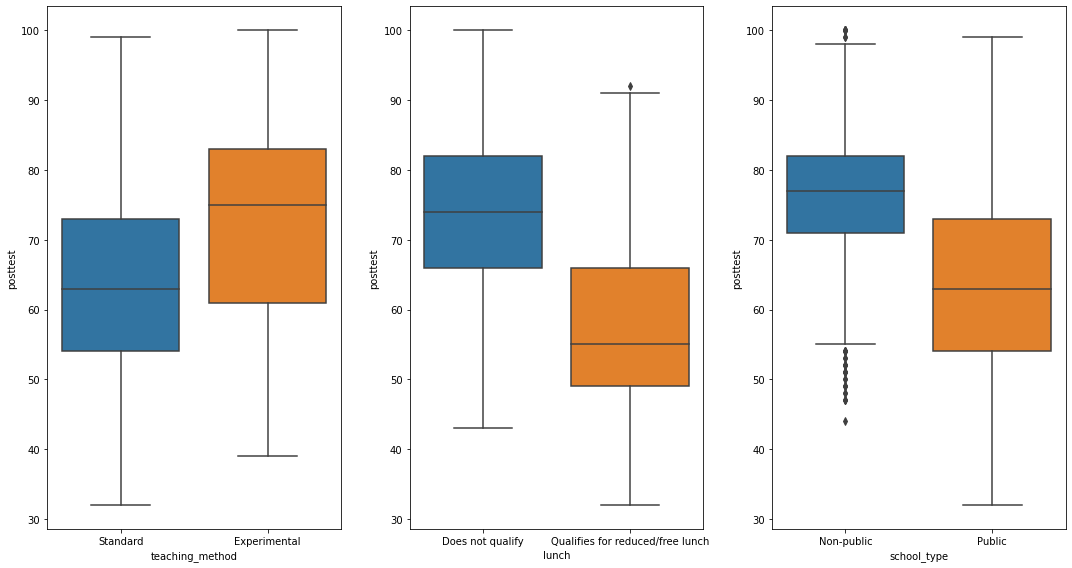

In [13]:
f, axes = plt.subplots(1, 3,figsize=(15,8))
sns.boxplot(data=data, x='teaching_method', y='posttest', ax=axes[0])
sns.boxplot(data=data, x='lunch', y='posttest', ax=axes[1])
sns.boxplot(data=data, x='school_type', y='posttest', ax=axes[2])
plt.tight_layout()
plt.show()

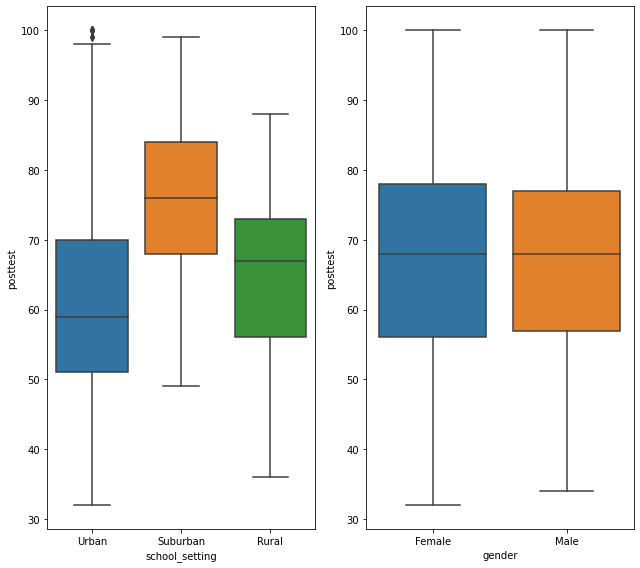

In [14]:
f, axes = plt.subplots(1, 2,figsize=(9,8))
sns.boxplot(data=data, x='school_setting', y='posttest', ax=axes[0])
sns.boxplot(data=data, x='gender', y='posttest', ax=axes[1])
plt.tight_layout()

In [15]:
post_desc = data['posttest'].describe()
pre_desc = data['pretest'].describe()

dif = post_desc['mean']-pre_desc['mean']
dif

12.146272855133617

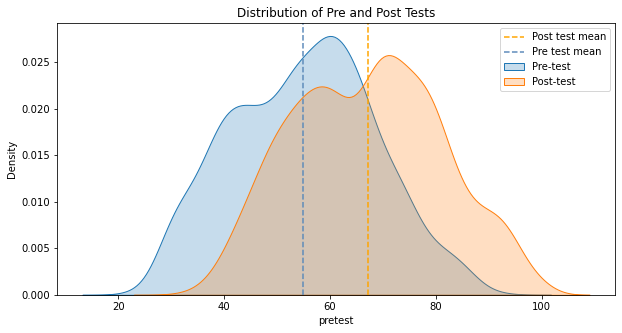

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data['pretest'], shade=True, label='Pre-test')
sns.kdeplot(data=data['posttest'], shade=True, label='Post-test')
plt.title('Distribution of Pre and Post Tests')
plt.axvline(x=post_desc['mean'], linestyle='--', color='orange',label='Post test mean')
plt.axvline(x=pre_desc['mean'], linestyle='--', color='#5D8BBA',label='Pre test mean')
plt.legend()
plt.show()

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

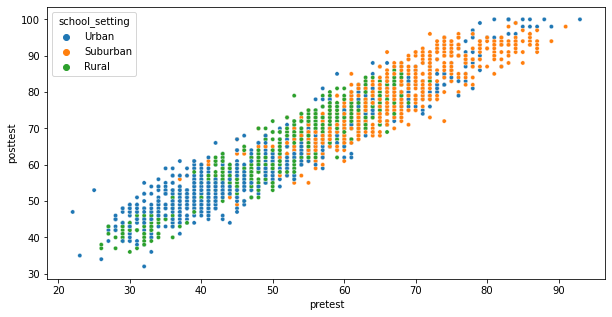

In [17]:

plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='pretest',y='posttest', hue='school_setting', s=18)

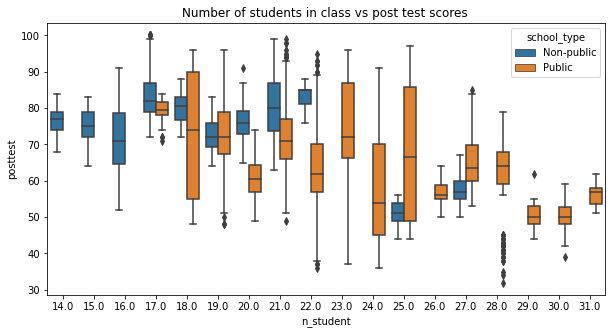

In [18]:
plt.figure(figsize=(10,5))
plt.title('Number of students in class vs post test scores ')
sns.boxplot(data=data, x='n_student', y='posttest', hue='school_type')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
def evaluating(y_act,y_pred):
    MAE = mean_absolute_error(y_act, y_pred)
    MSE = mean_squared_error(y_act, y_pred)
    r2 = r2_score(y_act, y_pred)
    eval_values = {'MAE': round(MAE,3), 'MSE' : round(MSE,3), 'r2' : round(r2,3)}
    print('Results:\n Mean absolute error = ', round(MAE,3),'\n Mean squared error = ', round(MSE,3),'\n R2 = ', round(r2,3))

    return eval_values

In [21]:
X = data[['pretest','n_student','school_setting','school_type','teaching_method','lunch']]
Y = data[['posttest']]
X = pd.get_dummies(X)
X.head(3)

,pretest,n_student,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,62.0,20.0,0,0,1,1,0,0,1,1,0
1,66.0,20.0,0,0,1,1,0,0,1,1,0
2,64.0,20.0,0,0,1,1,0,0,1,1,0


In [22]:
Xlin = X[['pretest']]
[x_adj, x_tst, y_adj, y_tst] = train_test_split(Xlin,Y,test_size=0.35, random_state=5)

model_linear= LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

only_pret_eval = evaluating(y_tst,y_pred)

Results:
 Mean absolute error =  3.428 
 Mean squared error =  18.395 
 R2 =  0.907


In [23]:
Xlin = X[['pretest','n_student']]
[x_adj, x_tst, y_adj, y_tst] = train_test_split(Xlin,Y,test_size=0.35, random_state=5)

model_linear= LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

pret_n_eval = evaluating(y_tst,y_pred)

Results:
 Mean absolute error =  3.389 
 Mean squared error =  17.995 
 R2 =  0.909


In [24]:
[x_adj, x_tst, y_adj, y_tst] = train_test_split(X,Y,test_size=0.35, random_state=5)

model_linear= LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

multi_eval = evaluating(y_tst,y_pred)

Results:
 Mean absolute error =  2.662 
 Mean squared error =  11.123 
 R2 =  0.944
